# Sample superstore analysis

In [4]:
# importing required libraries
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
pd.set_option('display.max_column',None)

In [14]:
df=pd.read_csv('superstore.csv',encoding='latin-1')

In [15]:
df.head()

,A`,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,4962,CA-2016-156587,7-3-2016,8-3-2016,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,Washington,98103.0,West,FUR-CH-10004477,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",48.712,1,0.2,5.4801
1,4963,CA-2016-156587,7-3-2016,8-3-2016,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,Washington,98103.0,West,OFF-AR-10001427,Office Supplies,Art,Newell 330,17.940,3,0.0,4.6644
2,4964,CA-2016-156587,7-3-2016,8-3-2016,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,Washington,98103.0,West,OFF-ST-10002344,Office Supplies,Storage,"Carina 42""Hx23 3/4""W Media Storage Unit",242.940,3,0.0,4.8588
3,8223,CA-2016-152905,18-2-2016,24-2-2016,Standard Class,AB-10015,Aaron Bergman,Consumer,United States,Arlington,Texas,76017.0,Central,OFF-ST-10000321,Office Supplies,Storage,Akro Stacking Bins,12.624,2,0.2,-2.5248
4,8802,CA-2018-140935,10-11-2018,12-11-2018,First Class,AB-10015,Aaron Bergman,Consumer,United States,Oklahoma City,Oklahoma,73120.0,Central,TEC-PH-10000562,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544


# data analysis

In [16]:
df.shape

(9994, 21)

In [17]:
df.dtypes

A`                  int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
Country/Region     object
City               object
State              object
Postal Code       float64
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   A`              9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A`,9994.0,4997.500000,2885.163629,1.000,2499.25000,4997.5000,7495.750,9994.000
Postal Code,9983.0,55245.233297,32038.715955,1040.000,23223.00000,57103.0000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [21]:
df.columns

Index(['A`', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country/Region', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [23]:
# checking null values
df.isna().sum()

A`                 0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

In [26]:
df.dropna(inplace=True)
df.isna().sum()

A`                0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country/Region    0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [37]:
pd.to_datetime('7-3-2016',dayfirst=True).month

3

In [41]:
# dealing with dates
df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'],dayfirst=True)


In [45]:
# create new column for month and year
df["Month"]=pd.to_datetime(df["Order Date"]).dt.month
df["Year"]=pd.to_datetime(df["Order Date"]).dt.year

In [46]:
df.head()

,A`,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year
0,4962,CA-2016-156587,2016-03-07,2016-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,Washington,98103.0,West,FUR-CH-10004477,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",48.712,1,0.2,5.4801,3,2016
1,4963,CA-2016-156587,2016-03-07,2016-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,Washington,98103.0,West,OFF-AR-10001427,Office Supplies,Art,Newell 330,17.940,3,0.0,4.6644,3,2016
2,4964,CA-2016-156587,2016-03-07,2016-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,Washington,98103.0,West,OFF-ST-10002344,Office Supplies,Storage,"Carina 42""Hx23 3/4""W Media Storage Unit",242.940,3,0.0,4.8588,3,2016
3,8223,CA-2016-152905,2016-02-18,2016-02-24,Standard Class,AB-10015,Aaron Bergman,Consumer,United States,Arlington,Texas,76017.0,Central,OFF-ST-10000321,Office Supplies,Storage,Akro Stacking Bins,12.624,2,0.2,-2.5248,2,2016
4,8802,CA-2018-140935,2018-11-10,2018-11-12,First Class,AB-10015,Aaron Bergman,Consumer,United States,Oklahoma City,Oklahoma,73120.0,Central,TEC-PH-10000562,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,11,2018


Text(0.5, 1.0, 'Month vs Sales')

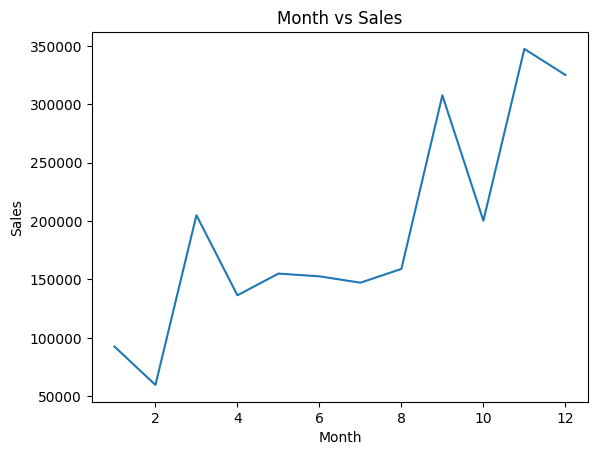

In [83]:
# monthly sales
a=df.groupby(by="Month")["Sales"].sum()
plt.plot(a)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Month vs Sales")

Text(0.5, 1.0, 'Year Vs Sales')

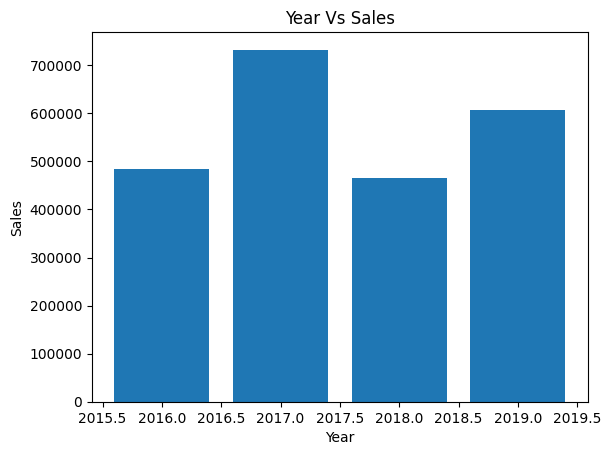

In [101]:
# Year wise Sales
a=df.groupby(by="Year")["Sales"].sum()
plt.bar(height=a,x=df["Year"].unique())
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Year Vs Sales")

In [102]:
df.head()

,A`,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year
0,4962,CA-2016-156587,2016-03-07,2016-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,Washington,98103.0,West,FUR-CH-10004477,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",48.712,1,0.2,5.4801,3,2016
1,4963,CA-2016-156587,2016-03-07,2016-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,Washington,98103.0,West,OFF-AR-10001427,Office Supplies,Art,Newell 330,17.940,3,0.0,4.6644,3,2016
2,4964,CA-2016-156587,2016-03-07,2016-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,Washington,98103.0,West,OFF-ST-10002344,Office Supplies,Storage,"Carina 42""Hx23 3/4""W Media Storage Unit",242.940,3,0.0,4.8588,3,2016
3,8223,CA-2016-152905,2016-02-18,2016-02-24,Standard Class,AB-10015,Aaron Bergman,Consumer,United States,Arlington,Texas,76017.0,Central,OFF-ST-10000321,Office Supplies,Storage,Akro Stacking Bins,12.624,2,0.2,-2.5248,2,2016
4,8802,CA-2018-140935,2018-11-10,2018-11-12,First Class,AB-10015,Aaron Bergman,Consumer,United States,Oklahoma City,Oklahoma,73120.0,Central,TEC-PH-10000562,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,11,2018


([<matplotlib.patches.Wedge at 0x2a0505d81d0>,
 [Text(-0.02403067228660816, 1.099737480851432, 'Consumer'),
  Text(-0.5901179351200079, -0.9283107360413853, 'Corporate'),
  Text(0.9151974359928843, -0.6102570385927971, 'Home Office')])

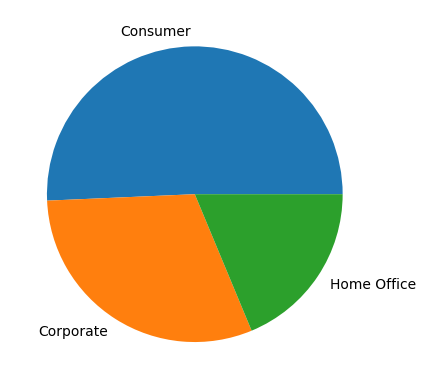

In [110]:
# segment wise sales
plt.pie(round(df.groupby("Segment")["Sales"].sum()),labels=df["Segment"].unique())

In [111]:
df.head()

,A`,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year
0,4962,CA-2016-156587,2016-03-07,2016-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,Washington,98103.0,West,FUR-CH-10004477,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",48.712,1,0.2,5.4801,3,2016
1,4963,CA-2016-156587,2016-03-07,2016-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,Washington,98103.0,West,OFF-AR-10001427,Office Supplies,Art,Newell 330,17.940,3,0.0,4.6644,3,2016
2,4964,CA-2016-156587,2016-03-07,2016-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,Washington,98103.0,West,OFF-ST-10002344,Office Supplies,Storage,"Carina 42""Hx23 3/4""W Media Storage Unit",242.940,3,0.0,4.8588,3,2016
3,8223,CA-2016-152905,2016-02-18,2016-02-24,Standard Class,AB-10015,Aaron Bergman,Consumer,United States,Arlington,Texas,76017.0,Central,OFF-ST-10000321,Office Supplies,Storage,Akro Stacking Bins,12.624,2,0.2,-2.5248,2,2016
4,8802,CA-2018-140935,2018-11-10,2018-11-12,First Class,AB-10015,Aaron Bergman,Consumer,United States,Oklahoma City,Oklahoma,73120.0,Central,TEC-PH-10000562,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,11,2018


<Axes: xlabel='Region', ylabel='count'>

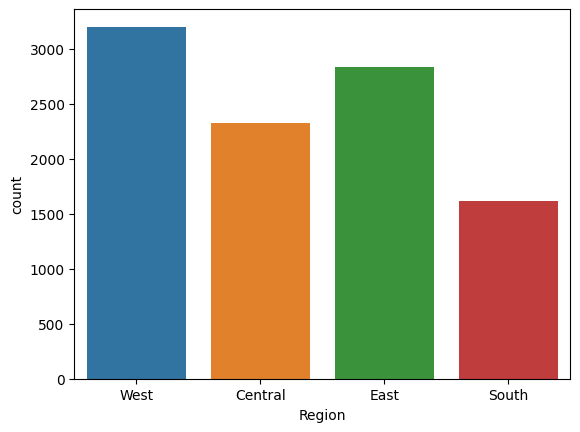

In [114]:
# region  wise count of orders
sns.countplot(x=df["Region"])

In [138]:
# category wis sales
d={
    "Category":df["Category"].unique(),
    "Quantity":df.groupby(by="Category")["Quantity"].count(),
    "Sales":df.groupby(by="Category")["Sales"].sum(),
    "Profit":df.groupby(by="Category")["Profit"].count()
}
data=pd.DataFrame(d)
data

,Category,Quantity,Sales,Profit
Category,,,,
Furniture,Furniture,2119,736879.6953,2119
Office Supplies,Office Supplies,6020,716837.5220,6020
Technology,Technology,1844,834554.2730,1844


Text(0.5, 1.0, 'Subcategory Vs Sales')

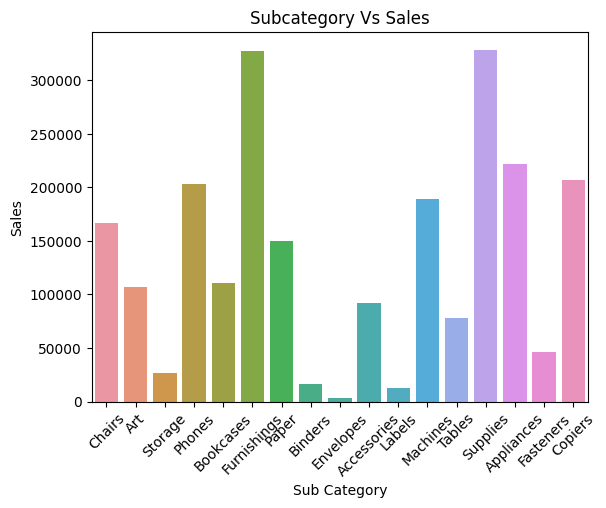

In [151]:
# Sales by subcategory
sns.barplot(data=df,x=df["Sub-Category"].unique(),y=df.groupby("Sub-Category")["Sales"].sum())
plt.xticks(rotation=45)
plt.xlabel("Sub Category")
plt.ylabel("Sales")
plt.title("Subcategory Vs Sales")

Text(0.5, 1.0, 'Monthly Profit')

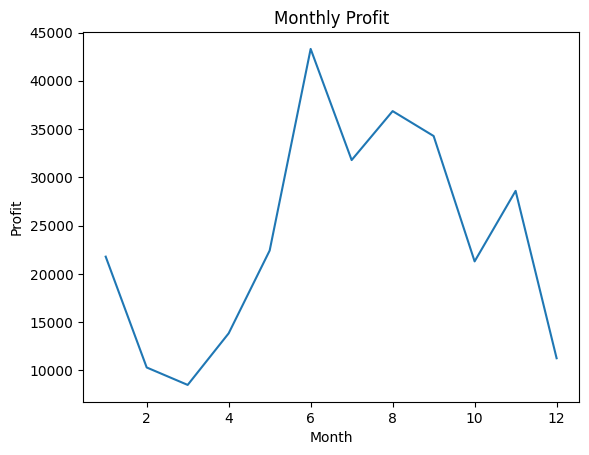

In [164]:
# monthly profit
sns.lineplot(x=df["Month"].unique(),y=df.groupby(by="Month")["Profit"].sum())
plt.xlabel("Month")
plt.ylabel("Profit")
plt.title("Monthly Profit")

<Axes: ylabel='Sales'>

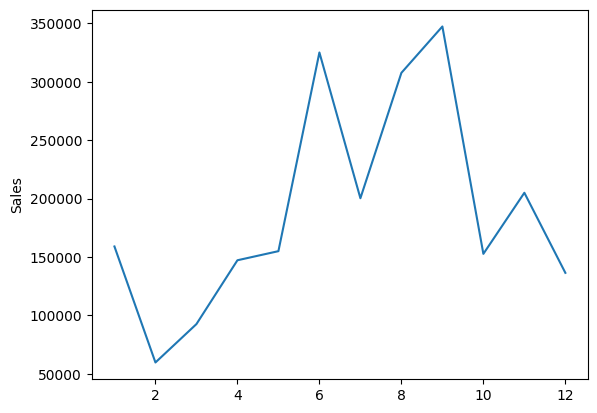

In [167]:
sns.lineplot(x=df["Month"].unique(),y=df.groupby(by="Month")["Sales"].sum())


In [171]:
df.groupby(by="Category")["Sales"]

,Month,Sales
Category,,
Furniture,16770,736879.6953
Office Supplies,46868,716837.5220
Technology,14367,834554.2730


In [180]:
sales_profit_by_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
sales_profit_by_segment

,Segment,Sales,Profit
0,Consumer,1.160049e+06,133744.0932
1,Corporate,6.998641e+05,90445.9067
2,Home Office,4.283584e+05,59962.0435


<Axes: xlabel='Segment', ylabel='Profit'>

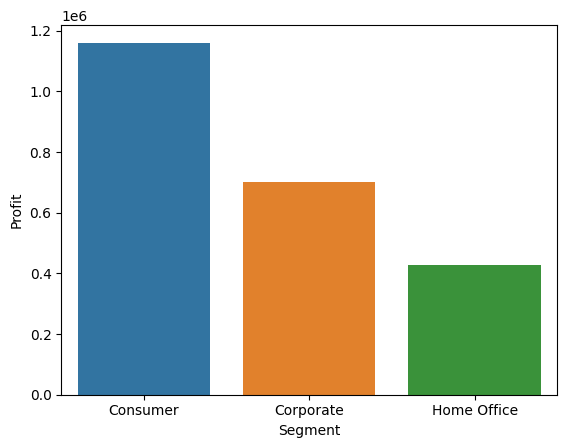

In [182]:
sns.barplot(x=sales_profit_by_segment["Segment"],y=sales_profit_by_segment["Sales"])
sns.barplot(x=sales_profit_by_segment["Segment"],y=sales_profit_by_segment["Profit"])

In [183]:
df .head()

,A`,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year
0,4962,CA-2016-156587,2016-03-07,2016-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,Washington,98103.0,West,FUR-CH-10004477,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",48.712,1,0.2,5.4801,3,2016
1,4963,CA-2016-156587,2016-03-07,2016-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,Washington,98103.0,West,OFF-AR-10001427,Office Supplies,Art,Newell 330,17.940,3,0.0,4.6644,3,2016
2,4964,CA-2016-156587,2016-03-07,2016-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,Washington,98103.0,West,OFF-ST-10002344,Office Supplies,Storage,"Carina 42""Hx23 3/4""W Media Storage Unit",242.940,3,0.0,4.8588,3,2016
3,8223,CA-2016-152905,2016-02-18,2016-02-24,Standard Class,AB-10015,Aaron Bergman,Consumer,United States,Arlington,Texas,76017.0,Central,OFF-ST-10000321,Office Supplies,Storage,Akro Stacking Bins,12.624,2,0.2,-2.5248,2,2016
4,8802,CA-2018-140935,2018-11-10,2018-11-12,First Class,AB-10015,Aaron Bergman,Consumer,United States,Oklahoma City,Oklahoma,73120.0,Central,TEC-PH-10000562,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,11,2018
